In [1]:
from fonctions import *

## Fonctions à disposition

### Lire les données
La fonction `lire_donnees()` permet de récupérer toutes les données stockées dans un dossier prédéfini sur l'ordinateur. Il est possible de faire par exemple `events = lire_donnees()` pour récupérer les événements. `events` est alors ce qu'on appelle une "base de données" avec une ligne par neutrino et plusieurs entrées pour chaque neutrino avec leur direction, énergie, etc....

On peut récupérer la liste des colonnes disponibles avec `events.columns`. Pour récupérer les valeurs d'une colonne particulière, il suffit de faire `events["nom de la colonne"]`. Il est éventuellement possible de rajouter des colonnes avec `events["nom de la nouvelle colonne"] = valeurs`. Enfin, il est possible de filtrer la base de données en définissant par exemple `events_apres_filtre = events[events["colonne pour filtrer"] > coupure]`.

### Dessiner la distribution d'une variable
La fonction `dessiner_histogramme(fichier_de_sortie, variable, nom, couleur, nbBins, ax_min, ax_max, titre)` permet de dessiner la distribution d'une quantité donnée:
- l'argument `fichier_de_sortie` correspond au chemin où l'image doit être sauvegardée
- l'argument `variable` est la liste des valeurs d'une colonne, par exemple obtenue avec `events["nom de la colonne"]`
- l'argument `nom` est le nom donnée à la variable pour indiquer sur l'axe horizontal de la figure
- l'argument `couleur` est optionnel et permet d'indiquer la couleur de la figure (par défaut bleu). Les couleurs disponibles sont indiquées ici : https://matplotlib.org/stable/_images/sphx_glr_named_colors_003.png.
- l'argument `nbBins` est optionnel et indique le nombre de segmentation de la figure (par défaut 20)
- les arguments `ax_min` et `ax_max` indique l'intervalle de l'axe horizontal. Si non fourni, alors les minimium/maximum de la liste fournie sont utilisés.
- l'argument `titre` permet d'indiquer un titre en haut de la figure

### Dessiner une carte du ciel
La fonction `dessiner_carte(fichier_de_sortie, ra, dec, couleur, titre)` permet de représenter une carte du ciel avec tous les neutrinos avec un point par neutrino:
- l'argument `fichier_de_sortie` correspond au chemin où l'image doit être sauvegardée
- l'argument `ra` correspond à l'ascension droite des neutrinos (en degrés)
- l'argument `dec` correspond à la déclinaison des neutrinos (en degrés)
- l'argument `couleur` est optionnel et permet d'indiquer la couleur de la figure (par défaut bleu). Les couleurs disponibles sont indiquées ici : https://matplotlib.org/stable/_images/sphx_glr_named_colors_003.png.
- l'argument `titre` correspond au titre de la figure indiqué au dessus de celle-ci

La fonction `dessiner_carte_histogramme(fichier_de_sortie, ra, dec, echelle_couleur, titre, resolution)` permet de représenter une carte du ciel avec tous les neutrinos mais avec une densité d'événement (couleur plus intense = plus de neutrinos dans cette direction):
- l'argument `fichier_de_sortie` correspond au chemin où l'image doit être sauvegardée
- l'argument `ra` correspond à l'ascension droite des neutrinos (en degrés)
- l'argument `dec` correspond à la déclinaison des neutrinos (en degrés)
- l'argument `echelle_couleur` est optionnel et permet d'indiquer l'échelle de couleur de la figure (par défaut un dégradé de bleu). Les couleurs disponibles sont indiquées ici : https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png.
- l'argument `titre` correspond au titre de la figure indiqué au dessus de celle-ci
- l'argument `resolution` permet de définir la précision de la carte : 1=très basse résolution, 10=très haute résolution

## Exemples

In [2]:
# lecture des données
events = lire_donnees()

In [3]:
# lister les colonnes
events.columns

Index(['MJD[days]', 'log10(E/GeV)', 'AngErr[deg]', 'RA[deg]', 'Dec[deg]',
       'Azimuth[deg]', 'Zenith[deg]'],
      dtype='object')

In [4]:
# voir un aperçu de toutes les données
events

,MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
0,54562.379113,3.31,0.48,203.024,16.760,218.374,106.712
1,54562.386622,5.17,0.62,75.024,-13.371,349.100,76.646
2,54562.387892,3.92,0.56,97.501,11.290,327.060,101.291
3,54562.392677,5.57,1.13,305.857,-33.932,120.413,56.090
4,54562.404776,5.80,1.11,143.516,-38.279,287.171,51.684
...,...,...,...,...,...,...,...
1134445,57528.838986,3.22,0.60,188.970,21.796,81.769,111.706
1134446,57528.847129,3.00,0.38,323.650,23.620,310.044,113.696
1134447,57528.850079,5.29,1.28,21.301,-82.893,253.796,7.195
1134448,57528.853812,5.11,0.92,41.021,-41.041,235.130,49.025


In [5]:
# voir un neutrino donné
events.iloc[42]

MJD[days]       54562.73091
log10(E/GeV)        3.68000
AngErr[deg]         0.43000
RA[deg]           181.48800
Dec[deg]           14.21500
Azimuth[deg]        6.90100
Zenith[deg]       104.17100
Name: 42, dtype: float64

In [6]:
# voir une colonne donnée
events["RA[deg]"]

0          203.024
1           75.024
2           97.501
3          305.857
4          143.516
            ...   
1134445    188.970
1134446    323.650
1134447     21.301
1134448     41.021
1134449      8.109
Name: RA[deg], Length: 1134450, dtype: float64

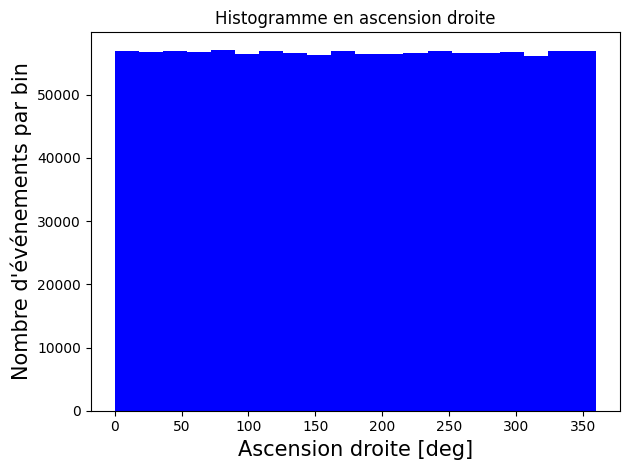

In [7]:
# histogramme en ascension droite
dessiner_histogramme(
    fichier_de_sortie="exemple_histogramme_ra",  # cela va sauver une image dans le dossier "figures" avec ce nom
    variable=events["RA[deg]"],  # colonne souhaitée
    nom="Ascension droite [deg]",  # nom sur l'axe des abscisses
    couleur="blue",  # couleur souhaitée
    ax_min=0, 
    ax_max=360,
    titre="Histogramme en ascension droite"
)

In [8]:
# définition d'une nouvelle colonne
events["sin(Dec)"] = sin(events["Dec[deg]"])

In [9]:
# filtrer les événements
events_haute_energie = events[events["log10(E/GeV)"] > 6]

0.0 180.0 -180.0 180.0


<Figure size 640x480 with 0 Axes>

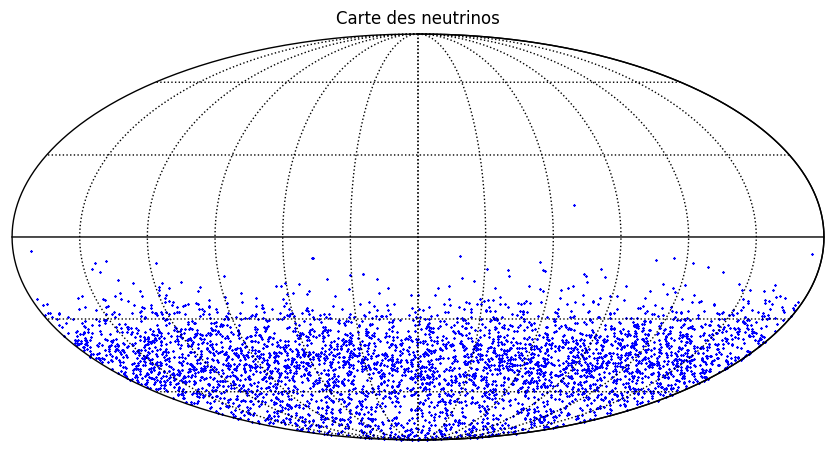

In [10]:
# dessiner une carte du ciel (un point par neutrino)
dessiner_carte(
    fichier_de_sortie="exemple_carte",
    ra=events_haute_energie["RA[deg]"],
    dec=events_haute_energie["Dec[deg]"],
    titre="Carte des neutrinos"
)

0.0 180.0 -180.0 180.0


<Figure size 640x480 with 0 Axes>

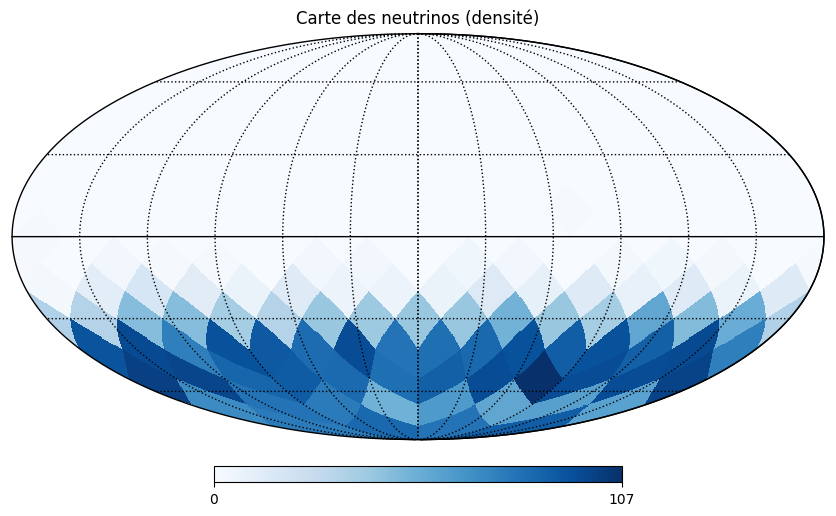

In [11]:
# dessiner une carte du ciel (couleur plus foncée = plus de neutrinos dans cette direction)
dessiner_carte_histogramme(
    fichier_de_sortie="exemple_carte_histogramme",
    ra=events_haute_energie["RA[deg]"],
    dec=events_haute_energie["Dec[deg]"],
    titre="Carte des neutrinos (densité)",
    resolution=2
)

# À vous de jouer !!

## Exploration des données

- Quelle est la distribution en déclinaison des neutrinos ? En sin(déclinaison) ? Laquelle des deux figures semble la plus pertinente ?
- Quelle est la distribution en énergie des neutrinos (`log10(E/GeV)`) ?
- Quelle est leur distribution sur le ciel ? Quelle méthode est préférable entre `dessiner_carte` et `dessiner_carte_histogramme` ?

## Recherche de neutrinos provenant d'une direction donnée

- On souhaite étudier les neutrinos provenant d'une direction $RA_{source}$, $DEC_{source}$. Quelles variables semblent les plus adaptées ?
- Si besoin, on peut calculer diverses quantités comme des distances angulaires, des cosinus/sinus, etc...
- Quelle figure finale permettrait de conclure ou non à la présence de signal ?
- Comment caractériser le bruit de fond et l'éventuel signal observé ?

On veut tester la position $RA_{source} = 219.9°$, $Dec_{source} = 60.8°$

## Étude de plusieurs sources astrophysiques potentielles

- Répétons maintenant la même procédure pour un catalogue de sources astrophysiques intéressantes.
- Y-a-t-il des excès intéressants parmis ces sources ?

In [12]:
# charger la liste des sources
sources = liste_sources(groupe="A")

In [13]:
# accéder aux sources une par une
print(sources[0])
print(sources[5]["Nom"], sources[5]["RA(source)"], sources[5]["Dec(source)"])

{'Nom': 'PKS_1424+240', 'RA(source)': 216.76, 'Dec(source)': 23.8}
PKS_0019+058 5.64 6.14


In [14]:
# faire une boucle sur les sources
for source in sources:
    print("Pour la source" + source["Nom"] + ":")
    print("  RA  =", source["RA(source)"])
    print("  Dec =", source["Dec(source)"])
    # et on peut faire d'autres opérations ici, comme calculé l'excès observé
    

Pour la sourcePKS_1424+240:
  RA  = 216.76
  Dec = 23.8
Pour la source4C_+01.28:
  RA  = 164.61
  Dec = 1.56
Pour la sourceTXS_0506+056:
  RA  = 77.35
  Dec = 5.7
Pour la sourceB2_1215+30:
  RA  = 184.48
  Dec = 30.12
Pour la sourcePKS_1717+177:
  RA  = 259.81
  Dec = 17.75
Pour la sourcePKS_0019+058:
  RA  = 5.64
  Dec = 6.14
Pour la sourcePKS_0736+01:
  RA  = 114.82
  Dec = 1.62
Pour la sourcePKS_0805-07:
  RA  = 122.07
  Dec = -7.86
Pour la sourceM_31:
  RA  = 10.82
  Dec = 41.24
